In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import List, Dict

from CONST import (SEED, COST_FUNCTIONS, LEARNING_FUNCTIONS, METRICS,
                   FEATURES_DIAMONDS, TARGET_DIAMONDS, FEATURES_WINES, TARGET_WINES)
from Dataset import Dataset
from models.RegressionModel import RegressionModel
from load_datasets import get_diamonds, get_wines
# from models.linear_regression import CustomLinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [36]:
np.random.seed(SEED)
models: Dict[str, RegressionModel] = dict()

In [37]:
def train(model: RegressionModel, dataset: Dataset):
    model.fit(dataset.x_train, dataset.y_train)

def calculate_metrics(actual, predictions) -> Dict[str, float]:
    metrics: Dict[str, float] = dict()
    
    for metric in METRICS:
        if metric == 'mse':
            metrics[metric] = mean_squared_error(actual, predictions)
        elif metric == 'mae':
            metrics[metric] = mean_absolute_error(actual, predictions)
        elif metric == 'r2':
            metrics[metric] = r2_score(actual, predictions)
    return metrics

def scatter_plot(actual: pd.DataFrame, prediction: pd.DataFrame, model_name: str=''):
    plt.figure(figsize=(8, 8))
    plt.scatter(actual, prediction, color='blue', alpha=0.7)
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 
              color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Actual vs. Predicted Values ')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

def show_metrics(metrics: Dict[str, float]) -> None:
    for metric in METRICS:
        print(f'{metric}: {metrics[metric]}')

In [38]:
diamonds_df = get_diamonds()
wines_df = get_wines()

diamonds = Dataset(diamonds_df, FEATURES_DIAMONDS, TARGET_DIAMONDS)
wines = Dataset(wines_df, FEATURES_WINES, TARGET_WINES)

diamonds.split()
wines.split()

In [39]:
for cost_function in COST_FUNCTIONS:
    for learning_function in LEARNING_FUNCTIONS:
        # models[f"LinearRegression_{cost_function}_{learning_function}"] = \
        #     CustomLinearRegression(cost_function=cost_function, learning_function=learning_function)

        # models[f"RandomForestRegressor_{cost_function}_{learning_function}"] = RandomForestRegressor()

        pass

In [40]:
models["LinearRegression_sklearn_diamonds"] = LinearRegression()
models["LinearRegression_sklearn_wines"] = LinearRegression()
models["RandomForestRegressor_sklearn_diamonds"] = RandomForestRegressor(random_state=SEED)
models["RandomForestRegressor_sklearn_wines"] = RandomForestRegressor(random_state=SEED)

## Diamonds:

### Linear Regression

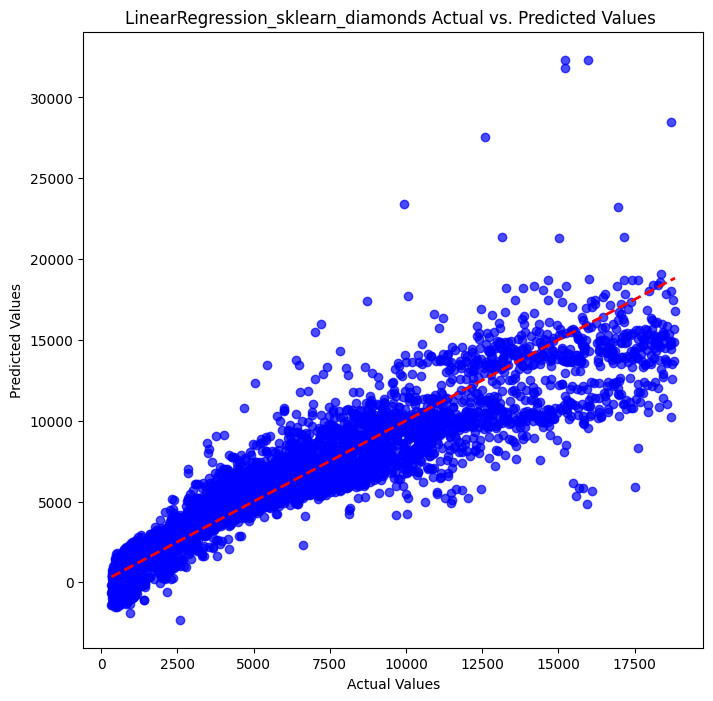

mse: 1825912.9915253473
mae: 858.7084697710086
r2: 0.8851397433679632


In [41]:
train(models["LinearRegression_sklearn_diamonds"], diamonds)

predictions = models["LinearRegression_sklearn_diamonds"].predict(diamonds.x_test)

scatter_plot(diamonds.y_test, predictions, 'LinearRegression_sklearn_diamonds')

show_metrics(calculate_metrics(diamonds.y_test, predictions))

### Random Forest Regression

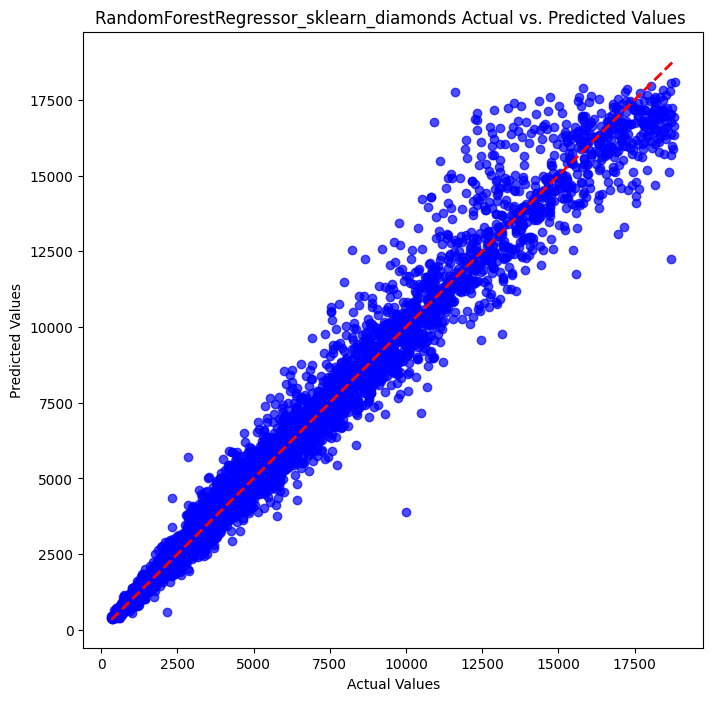

mse: 293815.4580713999
mae: 267.9755022379363
r2: 0.9815173455289631


In [42]:
train(models["RandomForestRegressor_sklearn_diamonds"], diamonds)

predictions = models["RandomForestRegressor_sklearn_diamonds"].predict(diamonds.x_test)

scatter_plot(diamonds.y_test, predictions, "RandomForestRegressor_sklearn_diamonds")

show_metrics(calculate_metrics(diamonds.y_test, predictions))

## Wines:

### Linear Regression

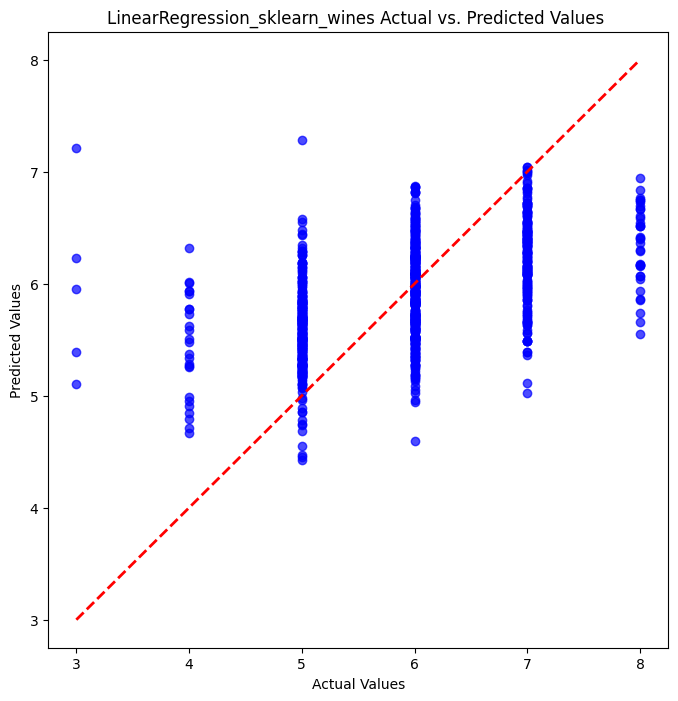

mse: 0.5690247717229263
mae: 0.5862665383250466
r2: 0.2652750042179143


In [43]:
train(models["LinearRegression_sklearn_wines"], wines)

predictions = models["LinearRegression_sklearn_wines"].predict(wines.x_test)

scatter_plot(wines.y_test, predictions, 'LinearRegression_sklearn_wines')

show_metrics(calculate_metrics(wines.y_test, predictions))

### Random Forest Regression

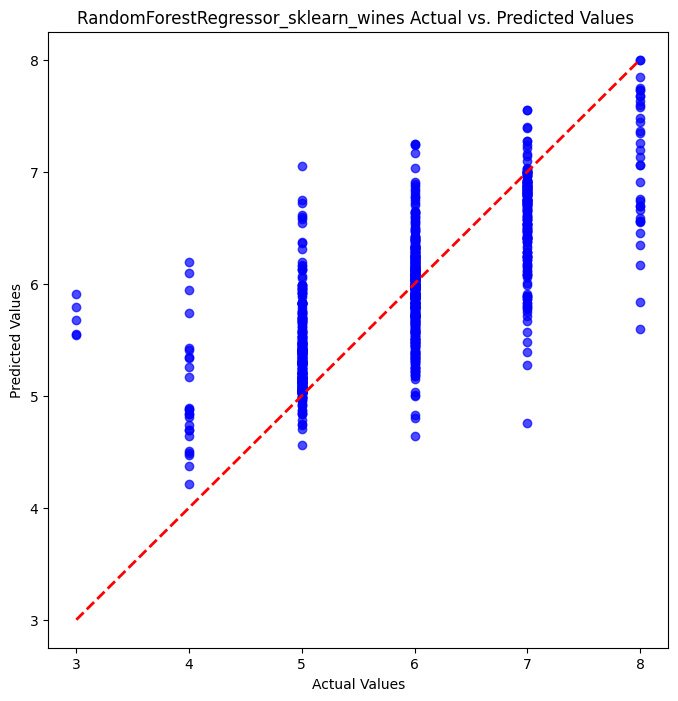

mse: 0.34775581632653063
mae: 0.4185204081632653
r2: 0.5509775612930288


In [44]:
train(models["RandomForestRegressor_sklearn_wines"], wines)

predictions = models["RandomForestRegressor_sklearn_wines"].predict(wines.x_test)

scatter_plot(wines.y_test, predictions, "RandomForestRegressor_sklearn_wines")

show_metrics(calculate_metrics(wines.y_test, predictions))